In [1]:
# choose right algorithm for this dataset
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('data.csv')

In [4]:
dataset.shape
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['diagnosis']=le.fit_transform(dataset['diagnosis'])
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# segregating Dataset into X & Y
X=dataset.iloc[:,2:32].values
Y=dataset.iloc[:,1].values

In [7]:
# Splitting dataset into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [9]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [10]:
# Validating some ML alg

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report)

In [12]:
model=SVC()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ",precision_score(Y_test,y_pred))
print("Recall: ",recall_score(Y_test,y_pred))
print("F1 Score: ",f1_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[88  2]
 [ 3 50]]
Accuracy:  0.965034965034965
Precision:  0.9615384615384616
Recall:  0.9433962264150944
F1 Score:  0.9523809523809523
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [15]:
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB()]

accuarcy=[]  #[('LR',98),()]
cm=[]
precision=[]
recall=[]
f1=[]
for model in models:
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)

    #accuracy
    accuracy_new=accuracy_score(Y_test,y_pred)
    accuarcy.append(accuracy_new)

    # confusion matrix
    cm_new=confusion_matrix(Y_test,y_pred)
    cm.append(cm_new)

    # precision,recall,F1score
    precision_new=precision_score(Y_test,y_pred)
    precision.append(precision_new)

    recall_new=recall_score(Y_test,y_pred)
    recall.append(recall_new)

    f1_new=f1_score(Y_test,y_pred)
    f1.append(f1_new)

print('Accuracy',accuarcy,end='\n\n')
print('Confusion Matrix',cm,end='\n\n')
print('Precision',precision,end='\n\n')
print('Recall',recall,end='\n\n')
print('F1 Score',f1,end='\n\n')

Accuracy [0.958041958041958, 0.951048951048951, 0.965034965034965, 0.8741258741258742, 0.916083916083916]

Confusion Matrix [array([[87,  3],
       [ 3, 50]]), array([[89,  1],
       [ 6, 47]]), array([[88,  2],
       [ 3, 50]]), array([[74, 16],
       [ 2, 51]]), array([[84,  6],
       [ 6, 47]])]

Precision [0.9433962264150944, 0.9791666666666666, 0.9615384615384616, 0.7611940298507462, 0.8867924528301887]

Recall [0.9433962264150944, 0.8867924528301887, 0.9433962264150944, 0.9622641509433962, 0.8867924528301887]

F1 Score [0.9433962264150944, 0.9306930693069307, 0.9523809523809523, 0.85, 0.8867924528301887]



In [16]:
! pip install seaborn

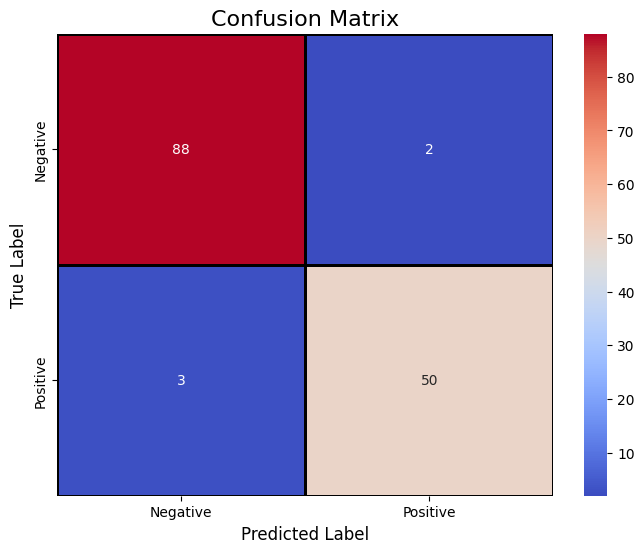

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# assume y_test and y_pred are already defined
# generate confusion matrix

model=SVC()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)

# create a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True, #display the numbers inside the boxes
    fmt='d',
    cmap='coolwarm',
    linewidth=1,
    linecolor='black',
    xticklabels=['Negative','Positive'],
    yticklabels=['Negative','Positive']

)

# add titles and labels
plt.title('Confusion Matrix',fontsize=16)
plt.xlabel('Predicted Label',fontsize=12)
plt.ylabel('True Label',fontsize=12)

# show the plot
plt.show()